## 데이터 파악

In [1]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd

In [2]:
# 난수 생성기가 항상 일정한 값을 출력하게 하기 위해 seed 고정
random_seed = 2022
np.random.seed(random_seed)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/timeseries/data'

In [5]:
train = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
train

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,74169,17764,34715,19806,42734,63382,14130,34866,71475,96849,79150,25109,14680,10465,128344,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,68923,14593,30279,17634,37661,57815,13055,31943,65378,92116,72379,23165,11879,9135,131682,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,54455,11997,27047,15943,29029,54627,12292,27424,60696,83628,57866,16629,8573,6488,127826,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,9363,4543,35618,7996,19478,10010,18663,39694,8818,17770,45983,57321,35250,10761,5331,4109,94288,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


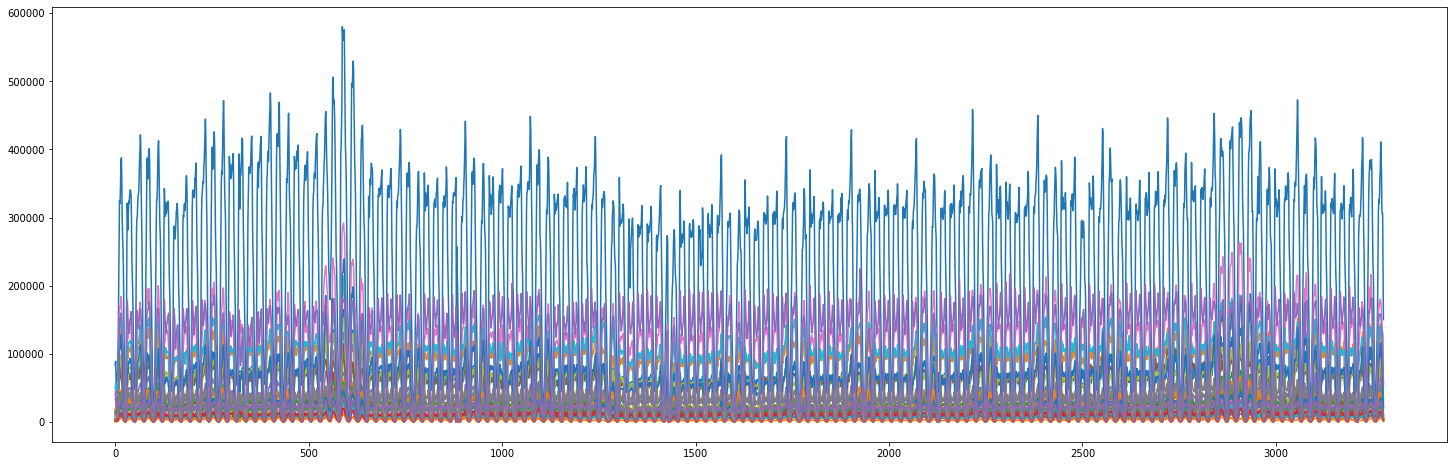

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 8))
plt.plot(train.iloc[:, 2:])

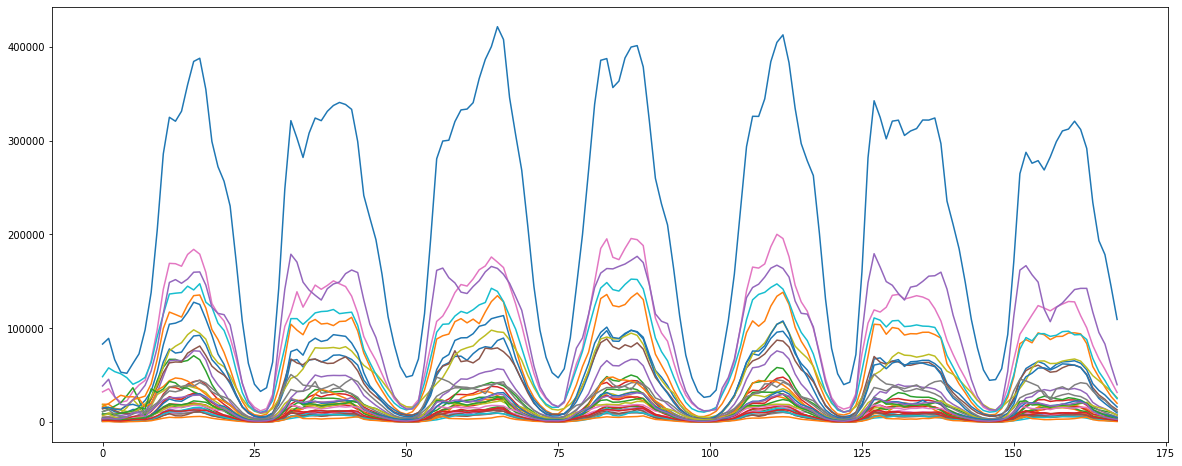

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(train.iloc[:168, 2:])  # 일단위로 주기 보임, 도로들끼리도 어느정도 비슷한 것 같음

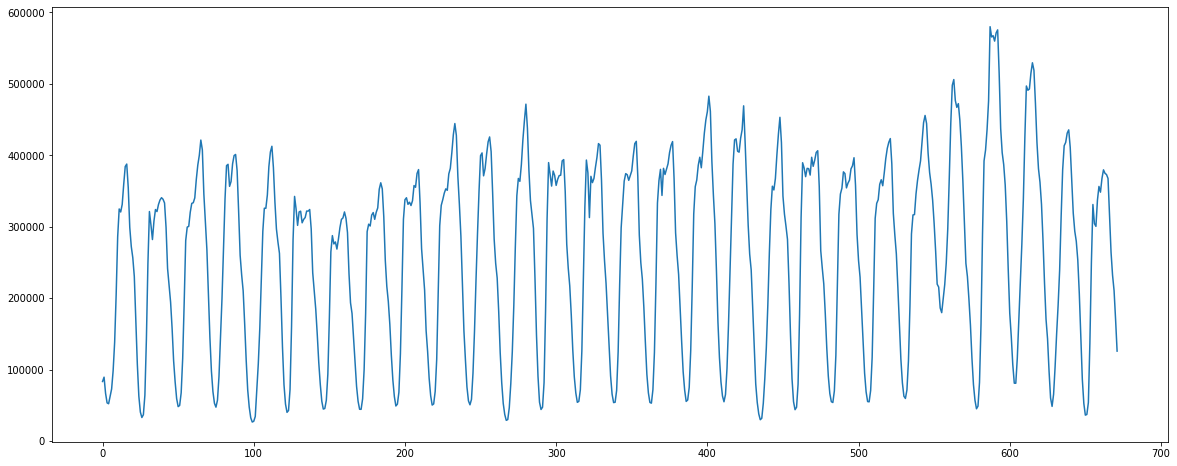

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(train.iloc[:672, 2])  # 설날 통행량 엄청 많음

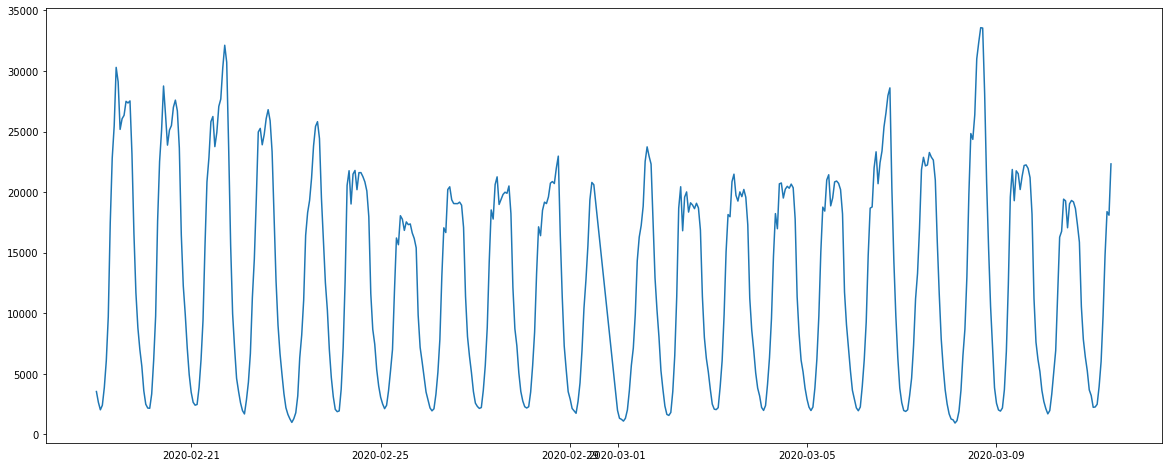

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(train.iloc[1176:1680, -1], train.iloc[1176:1680, 3])

In [ ]:
valid = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))
valid

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200511,0,77968,14429,1233,4021,981,881,28672,1064,2859,1549,12036,3225,7324,2789,5907,11097,2641,5396,20709,20787,8429,3184,2055,1430,27798,637,2604,5239,4168,1155,3596,337,2262,1608,2337
1,20200511,1,48679,9136,823,2618,654,572,17722,672,1940,1133,8316,2096,4423,1778,4028,7105,1773,3532,13160,13035,5459,1741,1230,859,16145,353,1870,3359,2558,1002,2157,257,1425,1018,1810
2,20200511,2,33773,8199,578,2188,392,502,14464,579,1425,1211,6623,2168,3693,1642,3376,5290,1268,3085,10377,10477,4610,1070,967,752,12335,345,1499,2646,2022,876,1959,232,1155,927,1530
3,20200511,3,41511,9986,726,2817,555,646,17793,650,1678,1748,7857,2593,4378,1637,4389,6325,1642,3983,11258,13014,5047,1289,1028,1129,14189,390,1730,3398,1967,912,2462,281,1477,959,1882
4,20200511,4,78680,19509,1463,4720,825,1088,35125,997,2531,2304,12197,4013,7034,3207,6514,13898,3185,8286,18038,27303,9132,2202,1599,1609,32976,679,2958,7369,4120,1569,4568,577,3155,1871,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,67748,16791,33325,19124,42183,63229,13163,35383,73188,100849,84286,26458,15572,10341,139827,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
332,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,61609,14119,30216,18610,35556,59070,12788,30675,68255,95107,76441,24140,13340,8872,142469,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
333,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,48336,11534,25710,15651,27467,53787,12019,26317,61169,86434,61136,21076,9317,6392,138816,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
334,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,8849,4553,33607,8069,18293,9723,16602,38615,8703,17694,47609,58492,37501,12090,5901,3938,100767,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


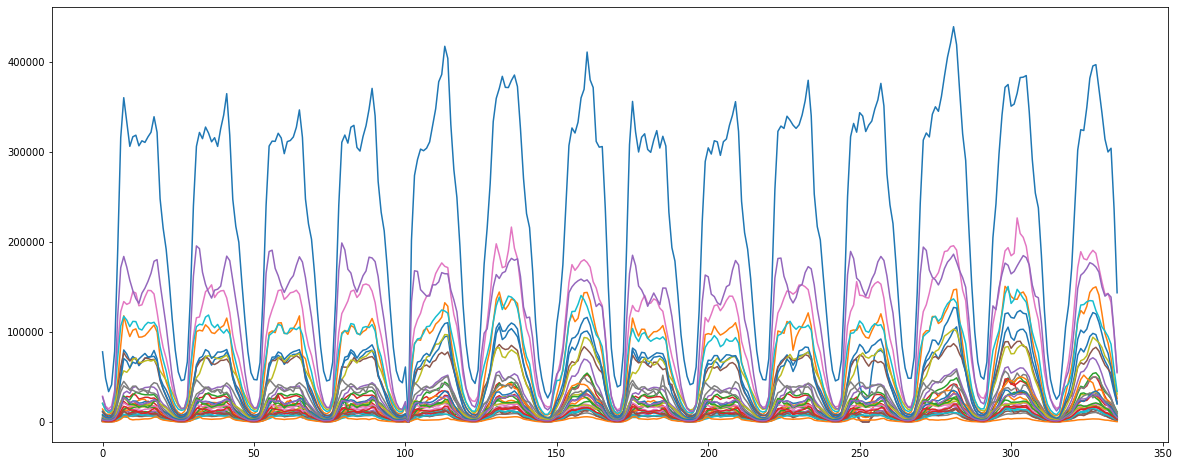

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(valid.iloc[:, 2:])

In [ ]:
test = pd.read_csv(os.path.join(DATASET_PATH, 'test.csv'))
test

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200518,0,82065,15172,1500,3294,1086,962,28931,1103,3014,1619,12596,3060,7383,2958,5829,11297,2890,5694,19553,18919,9907,2912,1884,1112,28189,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,20200518,1,51248,9840,813,2356,696,546,17888,720,1839,1502,7741,2132,4790,1743,4296,6781,1752,3651,12454,11849,6292,1750,1118,703,16683,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,20200518,2,39026,7894,760,2413,408,549,13357,498,1360,1233,6475,2098,3965,1345,3957,4762,1250,3199,9640,9392,4961,1104,1004,485,11934,322,1313,2765,1931,920,1764,228,1136,922,1309
3,20200518,3,40993,10137,780,2701,420,741,15544,532,1671,1800,7720,2133,4083,1501,3992,6202,1505,4459,10802,11664,6015,1132,1061,851,13458,326,1766,3320,2060,892,2447,337,1495,975,1912
4,20200518,4,77863,19603,1276,5019,968,1160,32101,968,2574,2384,12018,3502,6430,2882,5957,11987,3176,9054,16490,23479,10676,1945,1520,1420,31698,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200531,19,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
332,20200531,20,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
333,20200531,21,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
334,20200531,22,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
# !pip install pystan==2.19.1.1

In [ ]:
# !pip install fbprophet==0.7.0

In [ ]:
# !pip install plotly

In [ ]:
from fbprophet import Prophet

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      3279 non-null   int64
 1   시간      3279 non-null   int64
 2   10      3279 non-null   int64
 3   100     3279 non-null   int64
 4   101     3279 non-null   int64
 5   120     3279 non-null   int64
 6   121     3279 non-null   int64
 7   140     3279 non-null   int64
 8   150     3279 non-null   int64
 9   160     3279 non-null   int64
 10  200     3279 non-null   int64
 11  201     3279 non-null   int64
 12  251     3279 non-null   int64
 13  270     3279 non-null   int64
 14  300     3279 non-null   int64
 15  301     3279 non-null   int64
 16  351     3279 non-null   int64
 17  352     3279 non-null   int64
 18  370     3279 non-null   int64
 19  400     3279 non-null   int64
 20  450     3279 non-null   int64
 21  500     3279 non-null   int64
 22  550     3279 non-null   int64
 23  600     3279 

In [ ]:
train['날짜'] = train['날짜'].astype(str)
train['ds'] = pd.to_datetime(train['날짜']) + pd.to_timedelta(train['시간'], unit='h')
train['ds']

0      2020-01-01 00:00:00
1      2020-01-01 01:00:00
2      2020-01-01 02:00:00
3      2020-01-01 03:00:00
4      2020-01-01 04:00:00
               ...        
3274   2020-05-17 19:00:00
3275   2020-05-17 20:00:00
3276   2020-05-17 21:00:00
3277   2020-05-17 22:00:00
3278   2020-05-17 23:00:00
Name: ds, Length: 3279, dtype: datetime64[ns]

In [ ]:
train = train.drop(columns=['날짜', '시간'])

In [ ]:
train.columns

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000', 'ds'],
      dtype='object')

In [ ]:
holidays = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(['2020-01-01', '2020-01-24', '2020-01-25',
                        '2020-01-26', '2020-01-27', '2020-04-15', 
                        '2020-04-30', '2020-05-01', '2020-05-05']),
  'lower_window' : -1,
  'upper_window' : 1
})

In [ ]:
df = pd.DataFrame()
df['ds'] = train['ds']

pred = pd.DataFrame()

for i in range(35):
  df['y'] = train.iloc[:, i]

  m = Prophet(holidays=holidays,
              changepoint_range=0.95)  
  # changepoint_prior_scale=0.1
  # m.add_seasonality(name='monthly', period=30, fourier_order=5)
  m.fit(df)

  future = m.make_future_dataframe(freq='H', periods=168)
  forecast = m.predict(future)
  result = forecast[['ds', 'yhat']]
  
  pred[str(i)] = result['yhat']

pred['ds'] = future
pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,ds
0,64320.148212,16275.190074,2943.939821,6719.577199,2342.831479,1510.899636,26198.527901,1736.925083,7452.232909,2241.729230,12214.336413,5099.477383,13830.772385,3708.867993,14314.945439,5659.470592,191.679102,3156.724791,22305.274655,22419.339762,16793.329134,8766.788871,6837.658689,3159.836716,14705.035784,919.461035,2022.774113,4166.361958,3708.458719,2302.024719,3688.741050,1123.889465,2262.409977,538.887679,2897.328439,2020-01-01 00:00:00
1,30945.420929,9574.842326,2409.788500,5479.145406,1815.494952,1216.397925,13389.664096,1304.607288,6553.552415,1778.017506,7847.445895,3908.413014,11597.033268,2704.370490,12095.523874,1272.361780,-729.231621,1365.593275,15707.673832,14034.387039,12949.359895,7567.511672,6040.827048,2547.699824,-2192.943781,495.800457,724.911304,327.119727,1294.436790,1872.528562,2441.603687,996.126297,1431.627828,-175.228284,1774.304782,2020-01-01 01:00:00
2,11054.517397,5491.087364,2059.059645,4965.628059,1150.585376,935.051369,7730.690893,991.179279,6038.912144,1744.745521,5178.784509,3645.086370,10972.315333,2263.092268,11143.019670,-1061.177997,-1084.059303,647.644211,12908.671800,9774.488112,10368.903474,7189.516676,5486.629916,2171.800106,-12936.046459,13.581607,-238.361553,-2667.042448,-544.814848,1791.440900,1599.070069,707.686911,174.283866,-938.619759,705.987385,2020-01-01 02:00:00
3,15524.075495,7436.838341,2159.284073,5455.810254,882.481337,871.006789,12137.573137,1006.615907,6243.734178,2089.140643,5082.162455,4352.977399,12092.265967,2567.830712,11695.491837,29.560417,-620.260884,1835.996573,14464.541020,12973.148812,10623.352237,7537.688694,5467.732950,2447.532262,-9878.697184,-135.010992,-88.686135,-2088.229246,-505.137944,1997.483719,1617.763857,511.568590,-266.294979,-1041.768065,809.256482,2020-01-01 03:00:00
4,49115.084728,17285.769116,2879.040019,7005.820118,1595.434291,1225.547252,26622.524550,1521.046917,7271.665185,2625.405241,8733.341610,5643.697753,14174.204796,3683.083453,13678.167310,5571.446558,709.518554,5297.992906,19184.119080,25260.578478,15342.988552,8328.749347,6167.298367,3490.218920,12087.209371,465.169545,1832.333566,3876.997212,2289.255668,2331.273786,2934.412312,743.734477,1557.616461,144.866451,2999.543903,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,298934.400240,88334.104200,8997.605838,25641.609893,9199.902294,7041.822281,126550.259904,6027.048100,18809.039150,7908.413846,65516.035141,13320.895788,28720.154457,17152.427684,35192.724233,52255.547927,12015.921339,28292.649521,65452.458737,90122.524272,70587.625949,18678.922272,12468.653897,8241.331381,144125.645370,7067.366178,14573.285542,25086.831237,17172.556508,6916.669914,21740.194576,3377.658429,16733.856185,10540.213149,18602.685017,2020-05-24 19:00:00
3443,257003.801748,68686.605906,6472.350345,19965.620326,6562.513237,5203.634642,106661.885226,4722.731381,14625.605085,6283.164783,53292.593832,10054.742574,23634.523057,13289.031895,27410.105128,41895.401408,10205.441795,22282.353375,57355.572558,72633.912977,54891.809842,14719.183179,8694.947208,5888.066247,122789.501253,5011.795178,12097.653537,18110.674627,14673.823397,5617.223581,17298.737068,2312.309617,12360.712660,7734.621486,13416.361704,2020-05-24 20:00:00
3444,216166.018798,52101.532047,4602.981415,15731.911936,4392.090886,3727.796527,88693.237711,3614.112743,11311.401055,4983.134564,42234.523363,7521.362857,19829.569775,10167.676780,20982.990004,32400.453528,8582.032370,17385.207652,50016.020198,55845.551367,41409.272159,11289.101291,5899.065217,4217.718487,98260.897266,3391.260948,9487.212575,10961.481218,11767.104006,4592.876516,13531.559127,1348.969269,8223.769341,5392.928406,9129.143472,2020-05-24 21:00:00
3445,178611.789915,40508.009256,3474.365550,12905.993729,3105.852727,2827.084676,72118.750172,2825.070517,9124.

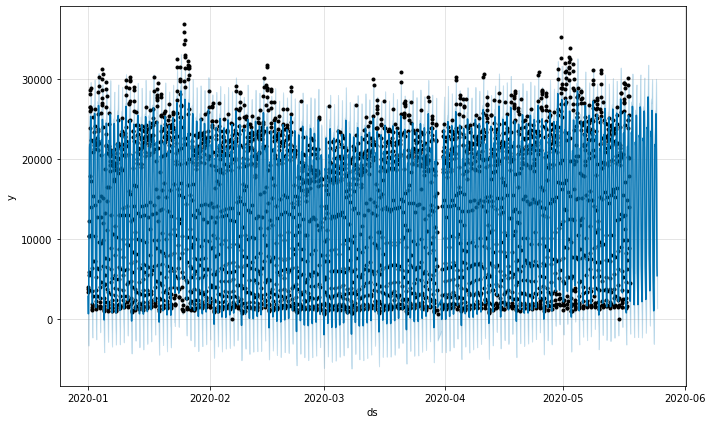

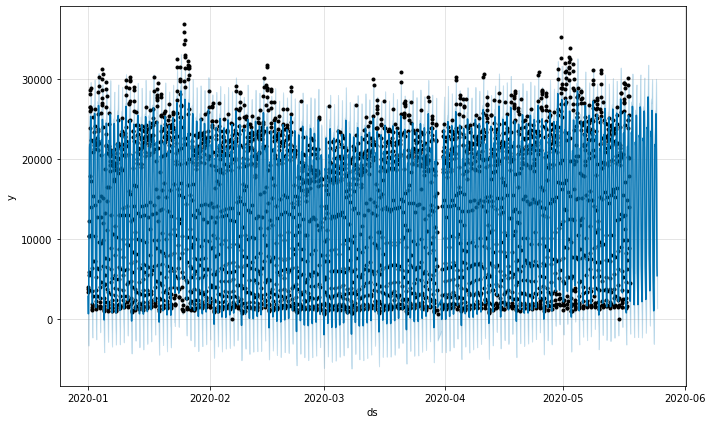

In [ ]:
m.plot(forecast)

In [ ]:
pred.columns = train.columns
pred.columns

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000', 'ds'],
      dtype='object')

In [ ]:
# rmse 구하기

pred_ = pred.iloc[-336:, :-1].reset_index(drop=True)
valid_ = valid.iloc[:, 2:].astype(float)

display(pred_, valid_)

,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,102321.734545,22754.976276,2160.481479,7200.575940,2010.226411,1897.137314,42119.223488,1581.349267,5510.905033,2219.676562,18425.497212,4496.508012,10352.167661,5581.540795,10972.472605,17592.281721,4358.705143,8615.652743,24490.722556,25357.386035,16480.106058,6188.059617,3361.440657,2141.592832,38001.981264,1460.543775,4054.176620,8739.075085,4977.075971,2593.706113,6531.920563,799.303073,3135.392959,2717.854847,4155.912729
1,69427.621597,16079.364920,1584.151826,5793.193126,1461.533386,1577.271312,28702.565643,1141.491005,4401.434160,1748.113503,13927.713636,3216.245290,7940.463158,4496.134518,8458.027683,13168.221477,3415.586490,6904.758220,18065.361651,16784.865623,12337.764394,4558.291559,2400.815618,1486.154473,21889.884679,1047.595204,2813.530516,5174.043236,2730.239462,2068.841502,5275.217971,681.564261,2405.772510,2058.929583,3062.595664
2,49844.867062,11989.618740,1189.245437,5107.379387,774.818276,1268.891515,22382.869759,818.523933,3674.336295,1703.080790,11105.846443,2857.914154,7127.030452,3967.522194,7197.442422,10762.803858,3032.425636,6247.898380,15402.390830,12297.871645,9437.057641,3752.551925,1683.439111,1064.163466,11882.160178,573.626615,1902.258000,2443.194966,1055.536888,1890.879855,4412.089445,402.441264,1243.342994,1346.887352,2016.598843
3,54452.463213,13899.324887,1243.535315,5420.993995,484.523307,1176.293057,26079.609378,822.532380,3666.303700,2031.955681,10834.667039,3465.509664,8049.092663,4179.004288,7430.694296,11747.569882,3462.074250,7478.166245,17058.640250,15230.913068,9351.142887,3677.630909,1502.613924,1291.333990,15620.049380,430.800488,2098.491451,3272.633865,1256.190050,1999.029170,4399.409303,214.847270,890.996271,1290.996818,2134.804617
4,88015.575715,23683.180252,1915.860371,6791.269066,1174.974928,1500.923414,39808.994011,1323.775329,4482.237512,2549.127184,14291.134237,4651.199300,9925.614804,5195.638083,9084.979409,17150.595577,4752.258199,10963.090072,21843.871428,27215.638632,13712.259369,4052.077718,2042.122863,2283.332202,38208.106449,1034.277240,4060.470508,9474.223660,4207.131247,2234.385699,5674.267218,454.673219,2796.120021,2520.606436,4332.738039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,298934.400240,88334.104200,8997.605838,25641.609893,9199.902294,7041.822281,126550.259904,6027.048100,18809.039150,7908.413846,65516.035141,13320.895788,28720.154457,17152.427684,35192.724233,52255.547927,12015.921339,28292.649521,65452.458737,90122.524272,70587.625949,18678.922272,12468.653897,8241.331381,144125.645370,7067.366178,14573.285542,25086.831237,17172.556508,6916.669914,21740.194576,3377.658429,16733.856185,10540.213149,18602.685017
332,257003.801748,68686.605906,6472.350345,19965.620326,6562.513237,5203.634642,106661.885226,4722.731381,14625.605085,6283.164783,53292.593832,10054.742574,23634.523057,13289.031895,27410.105128,41895.401408,10205.441795,22282.353375,57355.572558,72633.912977,54891.809842,14719.183179,8694.947208,5888.066247,122789.501253,5011.795178,12097.653537,18110.674627,14673.823397,5617.223581,17298.737068,2312.309617,12360.712660,7734.621486,13416.361704
333,216166.018798,52101.532047,4602.981415,15731.911936,4392.090886,3727.796527,88693.237711,3614.112743,11311.401055,4983.134564,42234.523363,7521.362857,19829.569775,10167.676780,20982.990004,32400.453528,8582.032370,17385.207652,50016.020198,55845.551367,41409.272159,11289.101291,5899.065217,4217.718487,98260.897266,3391.260948,9487.212575,10961.481218,11767.104006,4592.876516,13531.559127,1348.969269,8223.769341,5392.928406,9129.143472
334,178611.789915,40508.009256,3474.365550,12905.993729,3105.852727,2827.084676,72118.750172,2825.070517,9124.540663,3958.504748,33098.246572,5544.889240,16883.278707,7885.411332,16062.709149,24502.092322,7172.93

,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,77968.0,14429.0,1233.0,4021.0,981.0,881.0,28672.0,1064.0,2859.0,1549.0,12036.0,3225.0,7324.0,2789.0,5907.0,11097.0,2641.0,5396.0,20709.0,20787.0,8429.0,3184.0,2055.0,1430.0,27798.0,637.0,2604.0,5239.0,4168.0,1155.0,3596.0,337.0,2262.0,1608.0,2337.0
1,48679.0,9136.0,823.0,2618.0,654.0,572.0,17722.0,672.0,1940.0,1133.0,8316.0,2096.0,4423.0,1778.0,4028.0,7105.0,1773.0,3532.0,13160.0,13035.0,5459.0,1741.0,1230.0,859.0,16145.0,353.0,1870.0,3359.0,2558.0,1002.0,2157.0,257.0,1425.0,1018.0,1810.0
2,33773.0,8199.0,578.0,2188.0,392.0,502.0,14464.0,579.0,1425.0,1211.0,6623.0,2168.0,3693.0,1642.0,3376.0,5290.0,1268.0,3085.0,10377.0,10477.0,4610.0,1070.0,967.0,752.0,12335.0,345.0,1499.0,2646.0,2022.0,876.0,1959.0,232.0,1155.0,927.0,1530.0
3,41511.0,9986.0,726.0,2817.0,555.0,646.0,17793.0,650.0,1678.0,1748.0,7857.0,2593.0,4378.0,1637.0,4389.0,6325.0,1642.0,3983.0,11258.0,13014.0,5047.0,1289.0,1028.0,1129.0,14189.0,390.0,1730.0,3398.0,1967.0,912.0,2462.0,281.0,1477.0,959.0,1882.0
4,78680.0,19509.0,1463.0,4720.0,825.0,1088.0,35125.0,997.0,2531.0,2304.0,12197.0,4013.0,7034.0,3207.0,6514.0,13898.0,3185.0,8286.0,18038.0,27303.0,9132.0,2202.0,1599.0,1609.0,32976.0,679.0,2958.0,7369.0,4120.0,1569.0,4568.0,577.0,3155.0,1871.0,3656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,314226.0,98345.0,10625.0,28618.0,8316.0,6684.0,141675.0,6619.0,23535.0,8572.0,67748.0,16791.0,33325.0,19124.0,42183.0,63229.0,13163.0,35383.0,73188.0,100849.0,84286.0,26458.0,15572.0,10341.0,139827.0,8254.0,16118.0,23304.0,14082.0,8447.0,21694.0,2180.0,15746.0,10903.0,21014.0
332,300001.0,87871.0,8226.0,22706.0,6981.0,5743.0,142933.0,6295.0,20953.0,7851.0,61609.0,14119.0,30216.0,18610.0,35556.0,59070.0,12788.0,30675.0,68255.0,95107.0,76441.0,24140.0,13340.0,8872.0,142469.0,5225.0,15297.0,21919.0,14526.0,7332.0,19732.0,1990.0,14096.0,10028.0,17787.0
333,304150.0,71126.0,6002.0,18317.0,4939.0,3779.0,133110.0,4781.0,15242.0,6101.0,48336.0,11534.0,25710.0,15651.0,27467.0,53787.0,12019.0,26317.0,61169.0,86434.0,61136.0,21076.0,9317.0,6392.0,138816.0,4072.0,12685.0,21135.0,14403.0,5443.0,16967.0,1359.0,11670.0,7963.0,14041.0
334,236751.0,44947.0,3575.0,11455.0,3135.0,2536.0,98582.0,3267.0,8849.0,4553.0,33607.0,8069.0,18293.0,9723.0,16602.0,38615.0,8703.0,17694.0,47609.0,58492.0,37501.0,12090.0,5901.0,3938.0,100767.0,2489.0,8093.0,14427.0,10914.0,3861.0,11397.0,859.0,7270.0,5194.0,8230.0


In [ ]:
error = pred_ - valid_
error

,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,24353.734545,8325.976276,927.481479,3179.575940,1029.226411,1016.137314,13447.223488,517.349267,2651.905033,670.676562,6389.497212,1271.508012,3028.167661,2792.540795,5065.472605,6495.281721,1717.705143,3219.652743,3781.722556,4570.386035,8051.106058,3004.059617,1306.440657,711.592832,10203.981264,823.543775,1450.176620,3500.075085,809.075971,1438.706113,2935.920563,462.303073,873.392959,1109.854847,1818.912729
1,20748.621597,6943.364920,761.151826,3175.193126,807.533386,1005.271312,10980.565643,469.491005,2461.434160,615.113503,5611.713636,1120.245290,3517.463158,2718.134518,4430.027683,6063.221477,1642.586490,3372.758220,4905.361651,3749.865623,6878.764394,2817.291559,1170.815618,627.154473,5744.884679,694.595204,943.530516,1815.043236,172.239462,1066.841502,3118.217971,424.564261,980.772510,1040.929583,1252.595664
2,16071.867062,3790.618740,611.245437,2919.379387,382.818276,766.891515,7918.869759,239.523933,2249.336295,492.080790,4482.846443,689.914154,3434.030452,2325.522194,3821.442422,5472.803858,1764.425636,3162.898380,5025.390830,1820.871645,4827.057641,2682.551925,716.439111,312.163466,-452.839822,228.626615,403.258000,-202.805034,-966.463112,1014.879855,2453.089445,170.441264,88.342994,419.887352,486.598843
3,12941.463213,3913.324887,517.535315,2603.993995,-70.476693,530.293057,8286.609378,172.532380,1988.303700,283.955681,2977.667039,872.509664,3671.092663,2542.004288,3041.694296,5422.569882,1820.074250,3495.166245,5800.640250,2216.913068,4304.142887,2388.630909,474.613924,162.333990,1431.049380,40.800488,368.491451,-125.366135,-710.809950,1087.029170,1937.409303,-66.152730,-586.003729,331.996818,252.804617
4,9335.575715,4174.180252,452.860371,2071.269066,349.974928,412.923414,4683.994011,326.775329,1951.237512,245.127184,2094.134237,638.199300,2891.614804,1988.638083,2570.979409,3252.595577,1567.258199,2677.090072,3805.871428,-87.361368,4580.259369,1850.077718,443.122863,674.332202,5232.106449,355.277240,1102.470508,2105.223660,87.131247,665.385699,1106.267218,-122.326781,-358.879979,649.606436,676.738039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,-15291.599760,-10010.895800,-1627.394162,-2976.390107,883.902294,357.822281,-15124.740096,-591.951900,-4725.960850,-663.586154,-2231.964859,-3470.104212,-4604.845543,-1971.572316,-6990.275767,-10973.452073,-1147.078661,-7090.350479,-7735.541263,-10726.475728,-13698.374051,-7779.077728,-3103.346103,-2099.668619,4298.645370,-1186.633822,-1544.714458,1782.831237,3090.556508,-1530.330086,46.194576,1197.658429,987.856185,-362.786851,-2411.314983
332,-42997.198252,-19184.394094,-1753.649655,-2740.379674,-418.486763,-539.365358,-36271.114774,-1572.268619,-6327.394915,-1567.835217,-8316.406168,-4064.257426,-6581.476943,-5320.968105,-8145.894872,-17174.598592,-2582.558205,-8392.646625,-10899.427442,-22473.087023,-21549.190158,-9420.816821,-4645.052792,-2983.933753,-19679.498747,-213.204822,-3199.346463,-3808.325373,147.823397,-1714.776419,-2433.262932,322.309617,-1735.287340,-2293.378514,-4370.638296
333,-87983.981202,-19024.467953,-1399.018585,-2585.088064,-546.909114,-51.203473,-44416.762289,-1166.887257,-3930.598945,-1117.865436,-6101.476637,-4012.637143,-5880.430225,-5483.323220,-6484.009996,-21386.546472,-3436.967630,-8931.792348,-11152.979802,-30588.448633,-19726.727841,-9786.898709,-3417.934783,-2174.281513,-40555.102734,-680.739052,-3197.787425,-10173.518782,-2635.895994,-850.123484,-3435.440873,-10.030731,-3446.230659,-2570.071594,-4911.856528
334,-58139.210085,-4438.990744,-100.634450,1450.993729,-29.147273,291.084676,-26463.249828,-441.929483,275.540663,-594.495252,-508.753428,-2524.110760,-1409.721293,-1837.588668,-539.290851,-14112.907678,-1530.066712,-3754.931957,-4787.152475,-16757.529804,-5889.136020,-3768.08935

In [ ]:
squared_error = error**2

In [ ]:
squared_error_list = []

for col in squared_error.columns:
  squared_error_list += squared_error[col].values.tolist()

len(squared_error_list)

11760

In [ ]:
rmse = np.sqrt(np.mean(squared_error_list))
rmse

8850.701405531676

## train+valid -> test -> submission

In [ ]:
train = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
train

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,74169,17764,34715,19806,42734,63382,14130,34866,71475,96849,79150,25109,14680,10465,128344,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,68923,14593,30279,17634,37661,57815,13055,31943,65378,92116,72379,23165,11879,9135,131682,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,54455,11997,27047,15943,29029,54627,12292,27424,60696,83628,57866,16629,8573,6488,127826,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,9363,4543,35618,7996,19478,10010,18663,39694,8818,17770,45983,57321,35250,10761,5331,4109,94288,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [ ]:
valid = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))
valid

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200511,0,77968,14429,1233,4021,981,881,28672,1064,2859,1549,12036,3225,7324,2789,5907,11097,2641,5396,20709,20787,8429,3184,2055,1430,27798,637,2604,5239,4168,1155,3596,337,2262,1608,2337
1,20200511,1,48679,9136,823,2618,654,572,17722,672,1940,1133,8316,2096,4423,1778,4028,7105,1773,3532,13160,13035,5459,1741,1230,859,16145,353,1870,3359,2558,1002,2157,257,1425,1018,1810
2,20200511,2,33773,8199,578,2188,392,502,14464,579,1425,1211,6623,2168,3693,1642,3376,5290,1268,3085,10377,10477,4610,1070,967,752,12335,345,1499,2646,2022,876,1959,232,1155,927,1530
3,20200511,3,41511,9986,726,2817,555,646,17793,650,1678,1748,7857,2593,4378,1637,4389,6325,1642,3983,11258,13014,5047,1289,1028,1129,14189,390,1730,3398,1967,912,2462,281,1477,959,1882
4,20200511,4,78680,19509,1463,4720,825,1088,35125,997,2531,2304,12197,4013,7034,3207,6514,13898,3185,8286,18038,27303,9132,2202,1599,1609,32976,679,2958,7369,4120,1569,4568,577,3155,1871,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,67748,16791,33325,19124,42183,63229,13163,35383,73188,100849,84286,26458,15572,10341,139827,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
332,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,61609,14119,30216,18610,35556,59070,12788,30675,68255,95107,76441,24140,13340,8872,142469,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
333,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,48336,11534,25710,15651,27467,53787,12019,26317,61169,86434,61136,21076,9317,6392,138816,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
334,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,8849,4553,33607,8069,18293,9723,16602,38615,8703,17694,47609,58492,37501,12090,5901,3938,100767,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [ ]:
valid_ = valid.iloc[168:,:]
valid_

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
168,20200518,0,82065,15172,1500,3294,1086,962,28931,1103,3014,1619,12596,3060,7383,2958,5829,11297,2890,5694,19553,18919,9907,2912,1884,1112,28189,618,2790,5147,4331,1329,3665,404,2242,1619,2314
169,20200518,1,51248,9840,813,2356,696,546,17888,720,1839,1502,7741,2132,4790,1743,4296,6781,1752,3651,12454,11849,6292,1750,1118,703,16683,430,1864,3269,2561,921,2081,272,1390,1003,1766
170,20200518,2,39026,7894,760,2413,408,549,13357,498,1360,1233,6475,2098,3965,1345,3957,4762,1250,3199,9640,9392,4961,1104,1004,485,11934,322,1313,2765,1931,920,1764,228,1136,922,1309
171,20200518,3,40993,10137,780,2701,420,741,15544,532,1671,1800,7720,2133,4083,1501,3992,6202,1505,4459,10802,11664,6015,1132,1061,851,13458,326,1766,3320,2060,892,2447,337,1495,975,1912
172,20200518,4,77863,19603,1276,5019,968,1160,32101,968,2574,2384,12018,3502,6430,2882,5957,11987,3176,9054,16490,23479,10676,1945,1520,1420,31698,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,67748,16791,33325,19124,42183,63229,13163,35383,73188,100849,84286,26458,15572,10341,139827,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
332,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,61609,14119,30216,18610,35556,59070,12788,30675,68255,95107,76441,24140,13340,8872,142469,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
333,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,48336,11534,25710,15651,27467,53787,12019,26317,61169,86434,61136,21076,9317,6392,138816,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
334,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,8849,4553,33607,8069,18293,9723,16602,38615,8703,17694,47609,58492,37501,12090,5901,3938,100767,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [ ]:
train_valid = pd.concat([train, valid_])
train_valid

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,67748,16791,33325,19124,42183,63229,13163,35383,73188,100849,84286,26458,15572,10341,139827,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
332,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,61609,14119,30216,18610,35556,59070,12788,30675,68255,95107,76441,24140,13340,8872,142469,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
333,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,48336,11534,25710,15651,27467,53787,12019,26317,61169,86434,61136,21076,9317,6392,138816,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
334,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,8849,4553,33607,8069,18293,9723,16602,38615,8703,17694,47609,58492,37501,12090,5901,3938,100767,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [ ]:
train_valid['날짜'] = train_valid['날짜'].astype(str)
train_valid['ds'] = pd.to_datetime(train_valid['날짜']) + pd.to_timedelta(train_valid['시간'], unit='h')
train_valid

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000,ds
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799,2020-01-01 00:00:00
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010,2020-01-01 01:00:00
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388,2020-01-01 02:00:00
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686,2020-01-01 03:00:00
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,67748,16791,33325,19124,42183,63229,13163,35383,73188,100849,84286,26458,15572,10341,139827,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014,2020-05-24 19:00:00
332,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,61609,14119,30216,18610,35556,59070,12788,30675,68255,95107,76441,24140,13340,8872,142469,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787,2020-05-24 20:00:00
333,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,48336,11534,25710,15651,27467,53787,12019,26317,61169,86434,61136,21076,9317,6392,138816,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041,2020-05-24 21:00:00
334,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,8849,4553,33607,8069,18293,9723,16602,38615,8703,17694,47609,58492,37501,12090,5901,3938,100767,2489,8093,14427,10914,3861,11397,859,7270,5194,8230,2020-05-24 22:00:00


In [ ]:
train_valid = train_valid.drop(columns=['날짜', '시간'])

In [ ]:
df = pd.DataFrame()
df['ds'] = train_valid['ds']

pred = pd.DataFrame()

for i in range(35):
  df['y'] = train_valid.iloc[:, i]

  m = Prophet(holidays=holidays,
              changepoint_range=0.95)
  m.fit(df)

  future = m.make_future_dataframe(freq='H', periods=168)
  forecast = m.predict(future)
  result = forecast[['ds', 'yhat']]
  
  pred[str(i)] = result['yhat']

pred['ds'] = future
pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,ds
0,63974.622636,15781.805020,2983.262029,6542.613423,2326.856321,1493.118251,26493.257175,1729.438440,7300.757273,2187.853257,12247.638585,5124.353057,13682.229618,3608.608263,14155.725730,5900.516666,117.651159,2749.105474,21932.877693,22221.945624,16725.415051,8542.636967,6795.354590,3153.055335,14701.777525,911.295204,2009.433582,4349.520160,3901.907138,2277.116053,3703.077577,1158.913296,2279.823640,446.313374,2881.638669,2020-01-01 00:00:00
1,30356.114678,9031.373482,2450.006406,5293.365927,1797.676349,1200.420140,13639.019651,1294.729384,6392.890425,1724.960101,7859.095575,3939.941252,11433.476734,2591.317405,11942.049913,1489.969145,-813.249449,938.421002,15314.815326,13796.971968,12846.361863,7330.485297,5996.527902,2533.927685,-2392.684702,482.065178,696.614166,507.390803,1470.667385,1851.030411,2445.862387,1030.747799,1435.012161,-278.199169,1747.647408,2020-01-01 01:00:00
2,10402.430477,4923.261354,2099.503642,4782.907827,1130.961903,919.305010,7993.240342,979.477046,5876.584719,1693.819097,5182.522894,3682.748954,10810.348397,2147.965979,10993.327119,-826.173138,-1171.794717,219.291665,12515.377818,9591.700738,10266.214783,6944.109777,5440.841744,2154.647081,-13170.551626,-3.080884,-276.185874,-2479.588999,-379.983523,1772.569459,1605.327358,742.038235,170.686267,-1048.752152,675.107086,2020-01-01 02:00:00
3,15138.160476,6910.080754,2201.106905,5291.677887,864.525138,855.991921,12498.817810,995.662179,6088.134707,2043.380762,5108.099446,4392.443350,11950.779565,2465.865690,11552.920892,338.854267,-694.221869,1448.487480,14119.370469,12947.768040,10565.415666,7289.593197,5423.068888,2434.589115,-9919.971522,-146.942110,-121.680092,-1877.793755,-330.769666,1979.412470,1642.190670,547.779498,-259.401668,-1147.634036,786.992710,2020-01-01 03:00:00
4,49238.447756,16875.292114,2929.375235,6880.498510,1587.853796,1217.229385,27165.163761,1514.076180,7132.972169,2590.399793,8829.947081,5685.124746,14070.801645,3605.769062,13560.232686,6004.247842,671.970066,4991.280148,18932.695872,25418.547170,15374.283284,8090.540946,6130.946277,3489.296977,12388.536730,463.495087,1819.128479,4115.320536,2496.570343,2314.860523,2990.036837,784.252054,1595.476544,57.182319,2998.257365,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,301505.632871,89702.978885,8951.496863,25258.129028,9061.598066,6748.952505,130138.286544,6084.674316,19103.805927,7869.734301,63666.192340,14137.956673,29163.814368,17059.650711,36520.072731,54066.902220,12030.739298,29368.933097,65564.702195,90004.800466,72995.843292,20993.240298,13382.100699,8470.649555,144312.278743,7057.411266,14782.009225,23414.668707,17364.137860,7251.797143,21342.618281,2923.889188,16908.874702,10730.441661,18815.769370,2020-05-31 19:00:00
3611,259515.732189,69920.495158,6417.544960,19554.180844,6416.975511,4902.429986,110289.444350,4773.712104,14914.222469,6245.286380,51429.097887,10877.767281,24057.446890,13180.329595,28728.698484,43716.437576,10200.208484,23270.879885,57389.923444,72591.288868,57217.818758,17046.787779,9606.838844,6109.696797,123070.542163,4979.929833,12286.702592,16478.784619,14867.271907,5946.551033,16875.827035,1862.534267,12517.391925,7900.277726,13602.680956,2020-05-31 20:00:00
3612,218699.857012,53242.960537,4537.038047,15286.996824,4236.779933,3416.528791,92291.617601,3660.766280,11578.628786,4939.942420,40345.553986,8347.057447,20222.369740,10044.004964,22275.344615,34193.860803,8549.535458,18313.365776,49992.897689,55859.202542,43645.054152,13617.670304,6803.716913,4431.780161,98583.958302,3347.728995,9664.396173,9365.545553,11961.941802,4912.599445,13087.010385,902.659774,8363.579767,5541.221987,9294.208492,2020-05-31 21:00:00
3613,181178.600567,41595.646058,3396.628600,12423.990188,2940.339994,2506.479047,75629.389576,2869.513013,9361.31

In [ ]:
pred.columns = train_valid.columns

In [ ]:
sub = pd.read_csv(os.path.join(DATASET_PATH, 'sample_submission.csv'))
sub

,timestamp,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20200525_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20200525_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20200525_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200525_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,20200531_20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,20200531_21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,20200531_22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sub.iloc[:, 1:] = pred[-168:].reset_index(drop=True)
sub

,timestamp,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,106129.891530,25139.972135,2120.346672,7998.571317,1990.791491,1764.355075,42189.035570,1753.137483,6211.047686,2227.765503,17898.838161,3432.341174,10850.381371,4860.350144,10427.458635,15427.596070,4469.733371,9727.022074,25830.649803,21594.880332,20077.255064,5963.760590,3056.280957,2369.645841,37555.068407,1622.145027,4414.025905,1384.223349,5068.510415,2494.930066,6728.238389,373.169216,4017.406254,3009.068260,4557.300241
1,20200525_1,72901.147493,18383.801913,1540.122773,6569.970884,1436.105427,1442.231955,28683.512891,1308.899316,5085.521435,1753.639852,13359.563376,2156.621860,8414.753869,3756.142945,7911.141898,10973.778951,3514.441296,7986.373442,19359.755757,12940.440960,15885.166010,4320.766991,2093.110522,1704.565223,21177.819649,1200.320043,3156.127681,-2185.326125,2803.092338,1971.334026,5454.914251,255.304344,3271.014236,2336.364005,3447.403470
2,20200525_2,53165.985605,14239.585343,1140.857735,5874.791371,743.597525,1130.113030,22334.401688,982.151952,4349.908021,1707.260838,10510.370586,1802.615532,7593.822459,3219.631461,6646.840333,8578.907676,3125.201627,7317.482778,16671.499727,8466.190116,12969.562937,3506.214519,1373.587455,1276.637493,11067.715973,720.214464,2233.089952,-4910.364015,1115.553676,1793.934190,4587.216228,-23.804667,2098.727812,1613.845080,2391.735649
3,20200525_3,57951.974211,16160.788177,1192.194099,6194.624322,451.167734,1034.394484,26088.437481,984.997145,4341.799656,2037.749818,10242.557338,2410.560364,8527.157050,3438.630371,6879.906492,9630.672311,3566.091723,8577.137421,18351.390747,11515.034594,12912.712509,3428.107985,1193.130467,1505.572309,14932.687017,579.023555,2431.988146,-4058.999343,1324.250141,1900.906608,4586.134511,-209.243908,1753.875213,1558.989991,2513.303460
4,20200525_4,91939.041286,26032.067866,1868.997299,7591.474746,1148.402369,1362.017838,39959.351317,1488.366453,5167.909247,2562.070148,13751.599789,3597.166547,10432.495418,4474.453266,8551.780936,15149.579569,4889.991308,12130.844955,23206.399391,23642.054755,17346.952727,3811.897772,1740.106444,2507.269662,37799.055506,1189.790099,4411.676813,2169.794096,4306.604608,2136.042685,5885.638948,35.198330,3686.859272,2803.650650,4727.180442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,301505.632871,89702.978885,8951.496863,25258.129028,9061.598066,6748.952505,130138.286544,6084.674316,19103.805927,7869.734301,63666.192340,14137.956673,29163.814368,17059.650711,36520.072731,54066.902220,12030.739298,29368.933097,65564.702195,90004.800466,72995.843292,20993.240298,13382.100699,8470.649555,144312.278743,7057.411266,14782.009225,23414.668707,17364.137860,7251.797143,21342.618281,2923.889188,16908.874702,10730.441661,18815.769370
164,20200531_20,259515.732189,69920.495158,6417.544960,19554.180844,6416.975511,4902.429986,110289.444350,4773.712104,14914.222469,6245.286380,51429.097887,10877.767281,24057.446890,13180.329595,28728.698484,43716.437576,10200.208484,23270.879885,57389.923444,72591.288868,57217.818758,17046.787779,9606.838844,6109.696797,123070.542163,4979.929833,12286.702592,16478.784619,14867.271907,5946.551033,16875.827035,1862.534267,12517.391925,7900.277726,13602.680956
165,20200531_21,218699.857012,53242.960537,4537.038047,15286.996824,4236.779933,3416.528791,92291.617601,3660.766280,11578.628786,4939.942420,40345.553986,8347.057447,20222.369740,10044.004964,22275.344615,34193.860803,8549.535458,18313.365776,49992.897689,55859.202542,43645.054152,13617.670304,6803.716913,4431.780161,98583.958302,3347.728995,9664.396173,9365.545553,11961.941802,4912.599445,13087.010385,902.659774,8363.579767,5541.221987,9294.208492
166,20200531_22,181178.600567,41595.646058,3396.628600,12423.990188,2940.339994,2506.479047,75629.389576,

In [ ]:
sub.to_csv('prophet_again.csv', index=0)